In [1]:
import numpy as np
import pickle
from MSMRD.analysis import estimateConfidenceInterval, estimateMeanDistribution
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from scipy import stats as stats
plt.style.use('paperPlot')

In [2]:
pathBenchmark = '../data/asym2D/MFPTS/benchmark/'
pathHybrid = '../data/asym2D/MFPTS/hybrid/'

/srv/public/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


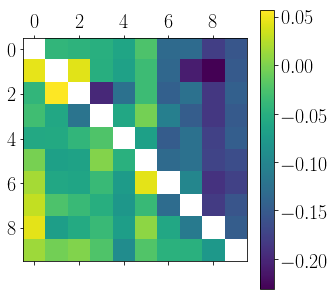

In [6]:
SF = 2
lagtime = 50
files = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '20', '40' , '80']
Nfiles = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40 , 80]
MFPT_benchmark = pickle.load(open(pathBenchmark+'mfpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
MFPT_hybrid = pickle.load(open(pathHybrid+'mfpts_10000runs_hybrid_box_lag'+str(lagtime)+'_SF'+str(SF)+'_exitCompensation_1files.p','r'))
plt.matshow((MFPT_hybrid-MFPT_benchmark)/MFPT_benchmark)
#plt.clim(-.1,0.1)
plt.colorbar()

/srv/public/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


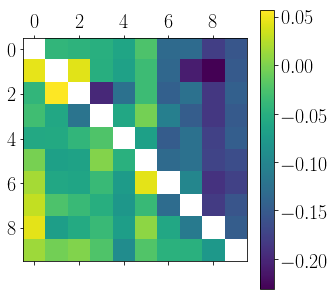

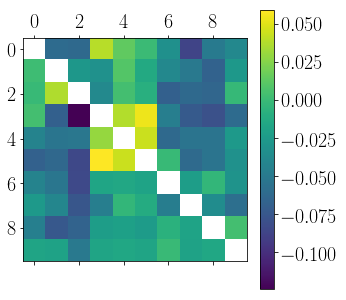

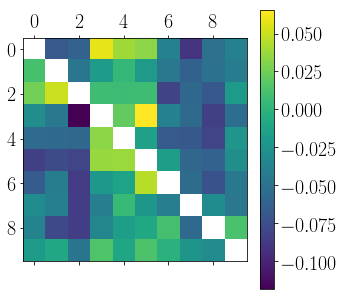

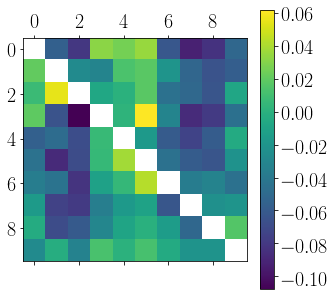

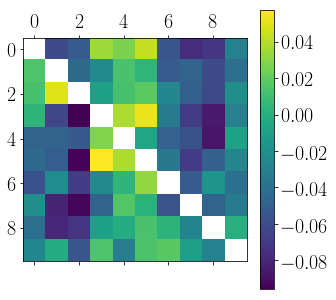

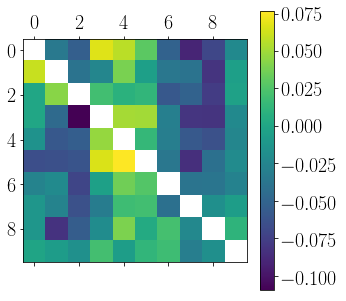

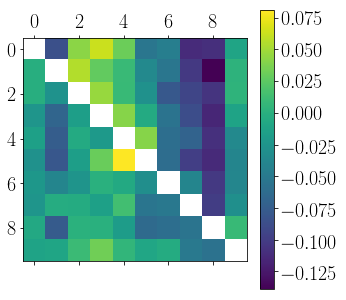

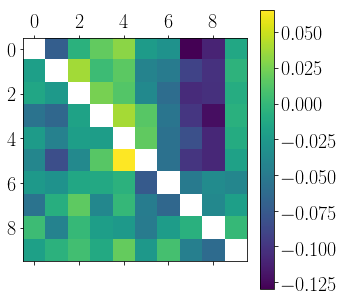

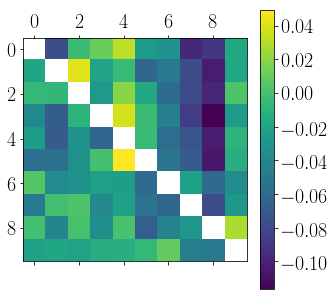

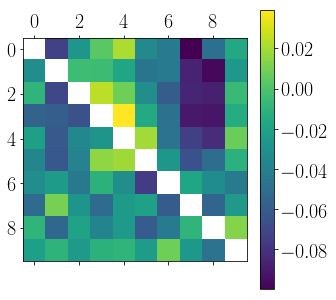

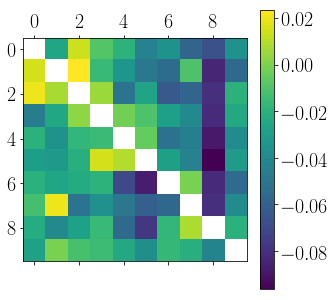

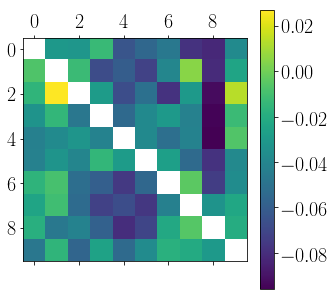

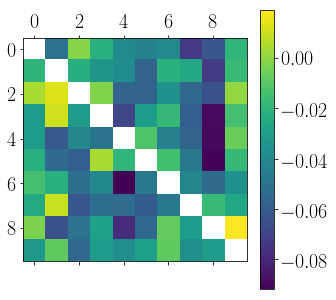

In [7]:
SF = 2
lagtime = 50
files = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '20', '40' , '80']
Nfiles = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40 , 80]
MFPT_benchmark = pickle.load(open(pathBenchmark+'mfpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
for i in range(len(files)):
    MFPT_hybrid = pickle.load(open(pathHybrid+'mfpts_10000runs_hybrid_box_lag'+str(lagtime)+'_SF'+str(SF)+'_exitCompensation_'+files[i]+'files.p','r'))
    plt.matshow((MFPT_hybrid-MFPT_benchmark)/MFPT_benchmark)b
    plt.colorbar()
    plt.savefig('../Report/figs/periodicModel/relativeError_mfpts_lag50_'+files[i]+'files.pdf')

/srv/public/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


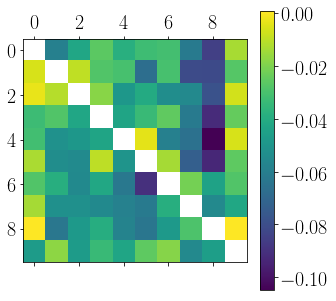

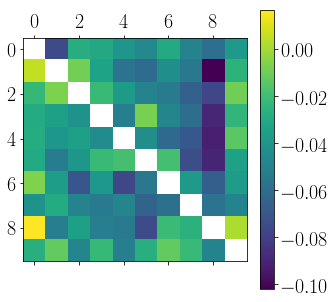

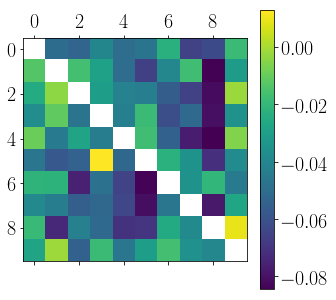

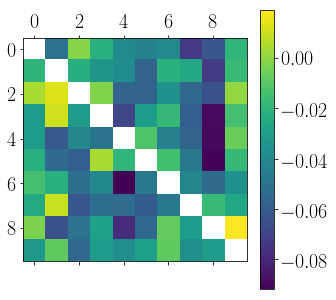

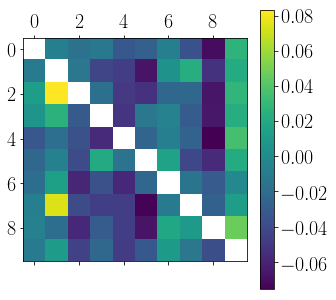

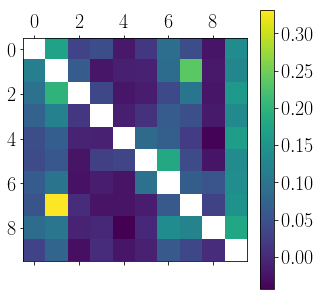

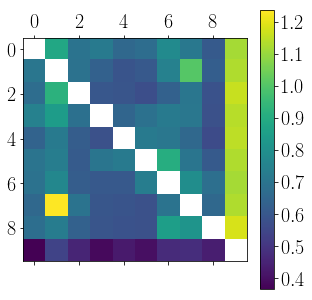

In [18]:
SF = 2
lagtime = 50
lagtimes = [10, 20, 40, 50, 100, 200, 400]
MFPT_benchmark = pickle.load(open(pathBenchmark+'mfpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
for i in range(len(lagtimes)):
    MFPT_hybrid = pickle.load(open(pathHybrid+'mfpts_10000runs_hybrid_box_lag'+str(lagtimes[i])+'_SF'+str(SF)+'_exitCompensation.p','r'))
    plt.matshow((MFPT_hybrid-MFPT_benchmark)/MFPT_benchmark)
    plt.colorbar()
    plt.savefig('../Report/figs/periodicModel/relativeError_mfpts_lag'+str(lagtimes[i])+'_80files.pdf')

In [9]:
SF = 2
lagtime = 50
FPT_benchmark = pickle.load(open(pathBenchmark+'fpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
oneNorm = np.zeros([10, 10, len(files)])
twoNorm = np.zeros([10, 10, len(files)])
for i in range(len(files)):
    FPT_hybrid = pickle.load(open(pathHybrid+'fpts_10000runs_hybrid_box_lag'+str(lagtime)+'_SF'+str(SF)+'_exitCompensation_' + files[i] +'files.p','r'))
    for j in range(10):
        for k in range(10):
            hist1 = np.histogram(FPT_benchmark[j][k], bins = 100, normed=True)
            hist2 = np.histogram(FPT_hybrid[j][k], bins = hist1[1],normed=True)
            oneNorm[j,k,i] = np.mean(np.abs(hist1[0] - hist2[0]))*(hist1[1][1]-hist1[1][0])*len(hist1[1])
            twoNorm[j,k,i] = np.linalg.norm(np.abs(hist1[0] - hist2[0])*(hist1[1][1]-hist1[1][0]))

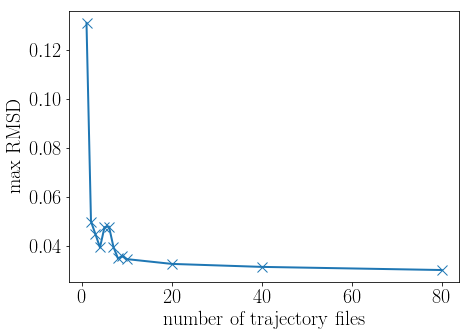

In [16]:
maxOneNorm = []
for i in range(len(Nfiles)):
    maxOneNorm.append(np.amax(twoNorm[:,:,i]))
plt.plot(Nfiles, maxOneNorm, '-x')
plt.ylabel('max RMSD')
plt.xlabel('number of trajectory files')
plt.savefig('../Report/figs/periodicModel/maxRMSDerror.pdf')

In [2]:
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-bright', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


0.0195655442258
0.109593808088


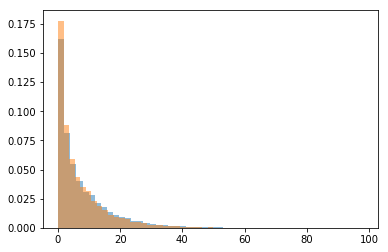

In [233]:
hist1 = plt.hist(FPT_benchmark[1][8], bins = 50, alpha=0.5, normed=True)
hist2 = plt.hist(FPT_hybrid[1][8], bins = 50, alpha=0.5, normed=True)
print np.linalg.norm(np.abs(hist1[0] - hist2[0]))
print np.mean(np.abs(hist1[0] - hist2[0]))*100

In [142]:
errors = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i!=j:
            errors[i,j] = estimateConfidenceInterval(FPT_hybrid[i][j][:10000]-MFPTS_benchmark, 1000)

NameError: name 'MFPTS_benchmark' is not defined

In [162]:
errors = np.zeros((10,10))
variances = np.zeros((10,10))
skewness = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i!=j:
            errors[i,j] = np.mean((FPT_hybrid[i][j] - MFPT_benchmark[i,j])/MFPT_benchmark[i,j])
            variances[i,j] = np.var((FPT_hybrid[i][j])/MFPT_benchmark[i,j])
            skewness[i,j] = stats.skew((FPT_hybrid[i][j])/MFPT_benchmark[i,j])

In [163]:
errorsBench = np.zeros((10,10))
variancesBench = np.zeros((10,10))
skewnessBench = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i!=j:
            variancesBench[i,j] = np.var( (FPT_benchmark[i][j])/MFPT_benchmark[i,j])
            skewnessBench[i,j] = stats.skew((FPT_benchmark[i][j])/MFPT_benchmark[i,j])

0.070342340647090856

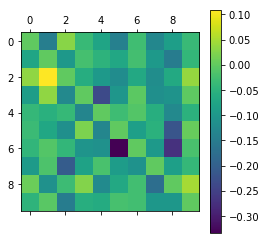

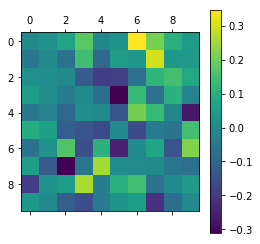

In [160]:
plt.matshow(variances-variancesBench)
plt.colorbar()
plt.matshow(skewness-skewnessBench)
plt.colorbar()
np.mean(np.absolute(variances-variancesBench))

0.14024115937947676

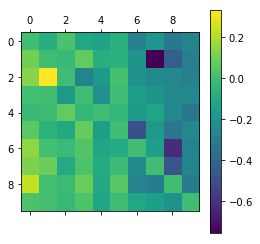

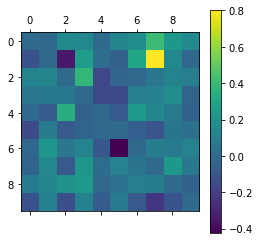

In [164]:
plt.matshow(variances-variancesBench)
plt.colorbar()
plt.matshow(skewness-skewnessBench)
plt.colorbar()
np.mean(np.absolute(variances-variancesBench))

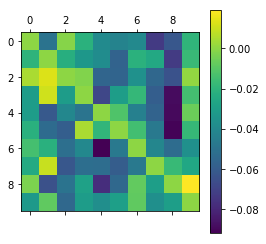

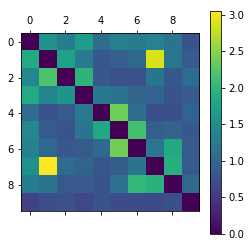

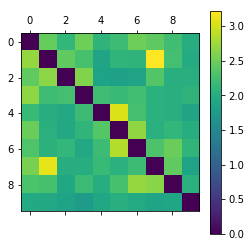

In [144]:
plt.matshow(errors)
plt.colorbar()
plt.matshow(variances)
plt.colorbar()
plt.matshow(skewness)
plt.colorbar()

<Container object of 3 artists>

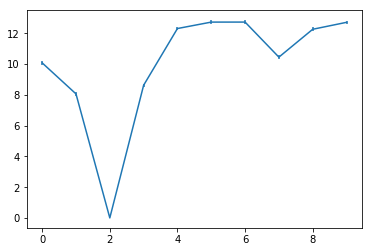

In [110]:
plt.errorbar(np.arange(0,10), MFPT_benchmark[:,2], yerr=errors[:,2])

In [27]:
means = estimateMeanDistribution(FPT_hybrid[1][8][:10000], 100000)

In [30]:
np.percentile(means, 84)

5.9866744920000601

In [29]:
print np.mean(means)

5.91309115993


In [137]:
FPT_benchmark = pickle.load(open(pathBenchmark+'fpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
FPT_hybrid = pickle.load(open(pathHybrid+'fpts_10000runs_hybrid_box_lag'+str(lagtime)+'_SF'+str(SF)+'_exitCompensation.p','r'))

3.5973388
4.7878272


4.6463851157950389

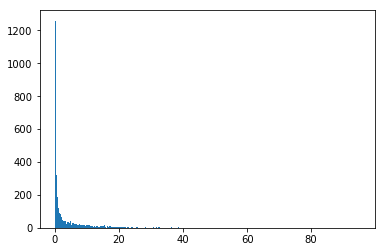

In [139]:
hist = plt.hist(FPT_benchmark[7][1], bins=1000)
print np.mean(FPT_benchmark[7][1])
print MFPT_hybrid[7,1]
np.mean(FPT_benchmark[7][1][np.where(FPT_benchmark[7][1] > 0.2)[0]])

In [74]:
print (MFPT_hybrid[7,1])
print (MFPT_benchmark[7,1])

4.7878272
3.5973388


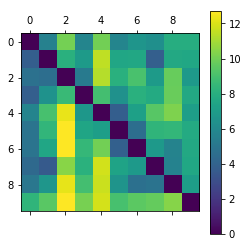

In [65]:
plt.matshow(MFPT_benchmark)
plt.colorbar()

/srv/public/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


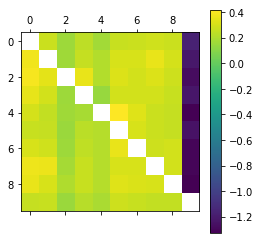

In [54]:
SF = 1
lagtime = 100
MFPT_benchmarkSF1 = pickle.load(open(pathBenchmark+'mfpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
SF = 2
MFPT_benchmarkSF2 = pickle.load(open(pathBenchmark+'mfpts_reference_10000runs_dt1E-3_SF'+str(SF)+'.0.p','r'))
plt.matshow((MFPT_benchmarkSF1-MFPT_benchmarkSF2)/MFPT_benchmarkSF1)
plt.colorbar()

In [66]:
expSamples = np.random.exponential(scale=5, size=10000)

In [88]:
sampleSize = 10000
samples = np.zeros(sampleSize)
for i in range(sampleSize):
    samples[i] = np.mean(np.random.exponential(scale=1, size=1000))

In [89]:
print np.std(samples)

0.031544296456


In [90]:
resamples = estimateMeanDistribution(np.random.exponential(scale=1, size=1000), 100000)

In [91]:
np.std(resamples)

0.034724865419607752